In [1]:
from dataset import CellsDataset, PATHS
from torchvision import transforms
import torchio.transforms as transformsio

# Ruta a la carpeta donde se encuentran las imágenes a las que hacer inferencia.
TEST_PATH = PATHS['RAW']
# target: Segmentación con espacio entre células. boundaries: Bordes de las células.
# not_segmented_target: Segmentación sin espaciado entre células.

transform = transforms.Compose([transformsio.ZNormalization()])
#data = CellsDataset(TEST_PATH, target_mode=MODE, transform=transform)

data_espaciado = CellsDataset(TEST_PATH, target_mode='target', transform=transform)
data_boundaries = CellsDataset(TEST_PATH, target_mode='boundaries', transform=transform)
data_multi_instance = CellsDataset(TEST_PATH, target_mode='multi_instance_target', transform=transform)

from utils import draw_images
multi_instance = data_multi_instance[0][1][0]
#, espaciado, boundaries, multi_instance = data_espaciado[0][0][0], data_espaciado[0][1][0], data_boundaries[0][1][0], data_multi_instance[0][1][0]


If you use TorchIO for your research, please cite the following paper:
Pérez-García et al., TorchIO: a Python library for efficient loading,
preprocessing, augmentation and patch-based sampling of medical images
in deep learning. Credits instructions: https://torchio.readthedocs.io/#credits



In [2]:
og, multi_instance, _, _ = data_multi_instance[0]

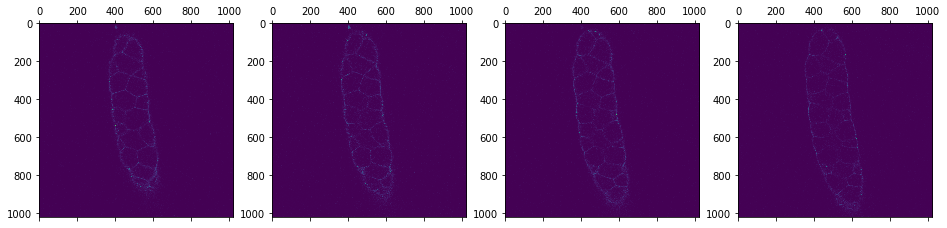

In [3]:
draw_images([og[0]],[60,70,80,90])
#, espaciado, boundaries, multi_instance

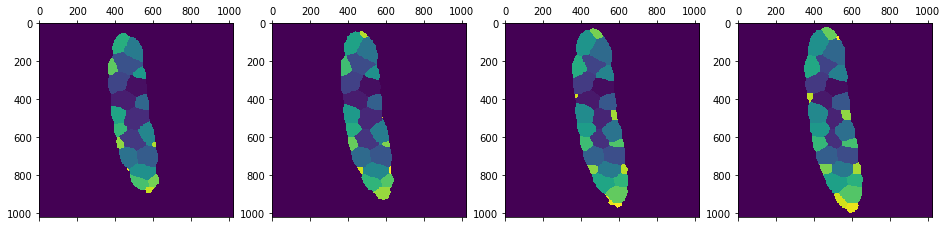

In [4]:
draw_images([multi_instance[0]],[60,70,80,90])


In [8]:
multi_instance = multi_instance[0]

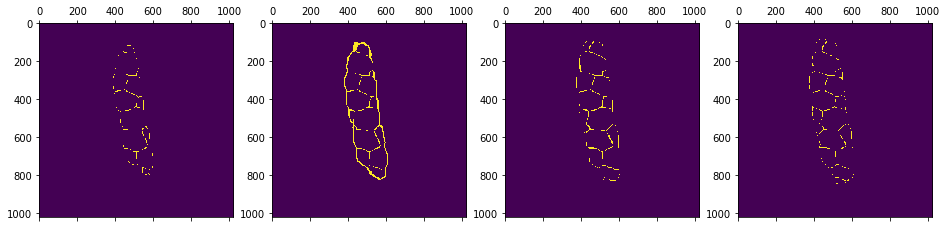

In [9]:
import numpy as np
from skimage import segmentation, measure
boundaries = segmentation.find_boundaries(np.array(multi_instance), connectivity=3, mode='outer')
draw_images([boundaries],[30,35,40,45])

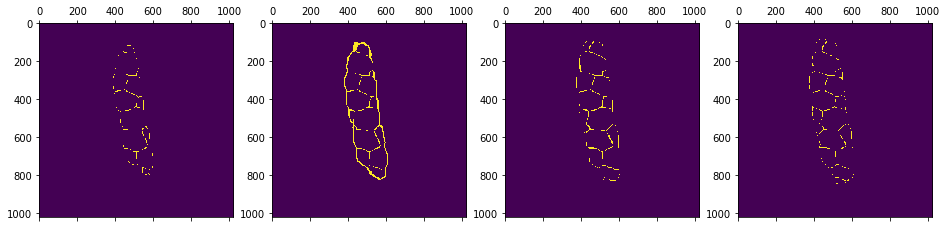

In [10]:
target_segmentation = np.copy(boundaries) * 1
draw_images([target_segmentation],[30,35,40,45])

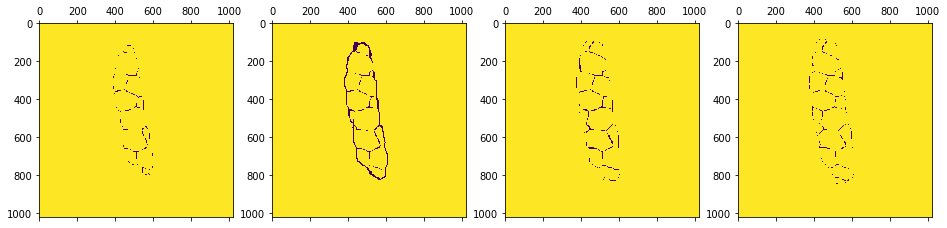

In [11]:
boundaries = (target_segmentation * -1) + 1
draw_images([boundaries],[30,35,40,45])

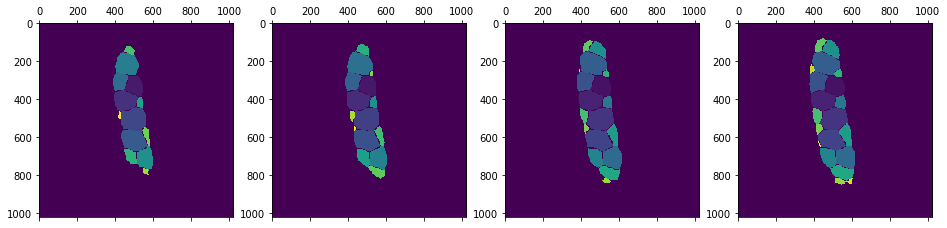

In [12]:
multi_instance *= boundaries
draw_images([multi_instance],[30,35,40,45])

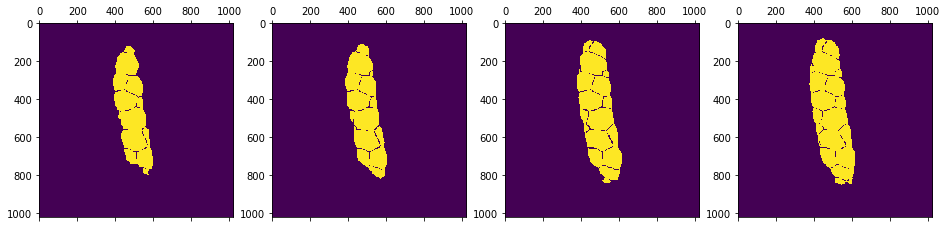

In [13]:
multi_instance = np.array(multi_instance)
multi_instance = np.ceil(multi_instance/1000).astype('i1')
draw_images([multi_instance],[30,35,40,45])